# Cell 1: Import Libraries

In [1]:
# Import necessary libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Load Two Audio Files

In [2]:
# Load male and female speech audio files
male_voice_path = 'male_audio.m4a'  # Replace with your male voice file path
female_voice_path = 'female_audio.m4a'  # Replace with your female voice file path

# Load audio signals
male_audio, male_sr = librosa.load(male_voice_path, sr=None)
female_audio, female_sr = librosa.load(female_voice_path, sr=None)

# Print audio information
print(f"Male Voice - Sampling Rate: {male_sr}, Duration: {len(male_audio)/male_sr:.2f} seconds")
print(f"Female Voice - Sampling Rate: {female_sr}, Duration: {len(female_audio)/female_sr:.2f} seconds")


Male Voice - Sampling Rate: 48000, Duration: 8.36 seconds
Female Voice - Sampling Rate: 48000, Duration: 9.94 seconds


/var/folders/c0/fzgnj9q11_78qpvqll__gxvw0000gn/T/ipykernel_64356/3585926885.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  male_audio, male_sr = librosa.load(male_voice_path, sr=None)
/opt/anaconda3/envs/mp1/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/c0/fzgnj9q11_78qpvqll__gxvw0000gn/T/ipykernel_64356/3585926885.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  female_audio, female_sr = librosa.load(female_voice_path, sr=None)
/opt/anaconda3/envs/mp1/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


# Cell 3: Side-by-Side Comparison of Long-Term Spectrum

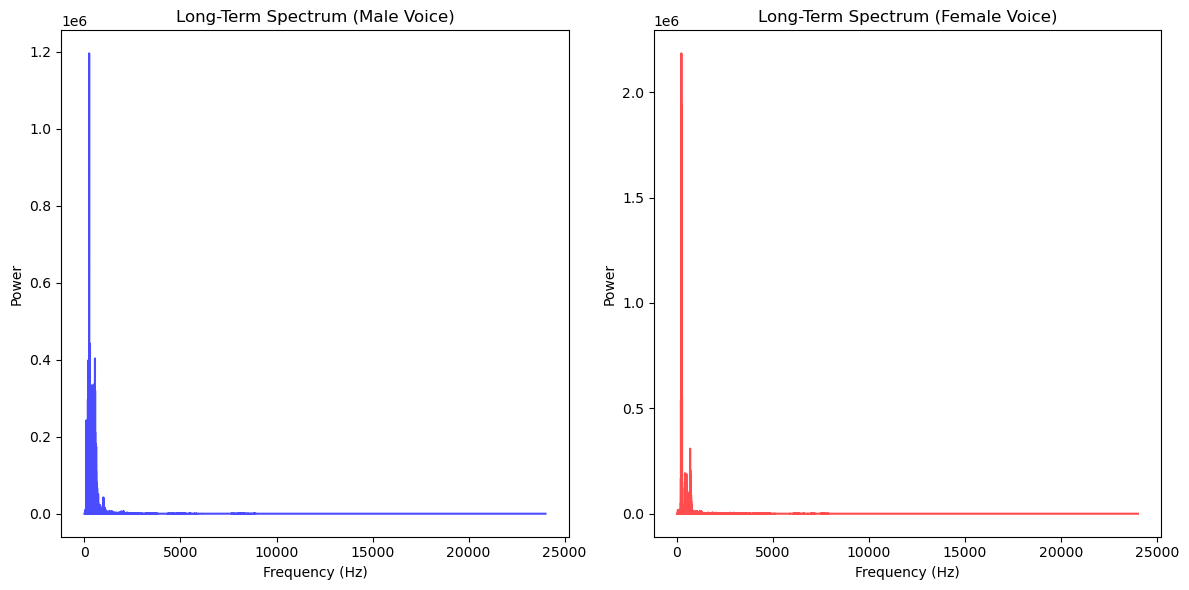

In [3]:
# Compute long-term spectrum (power spectral density)
male_fft = np.abs(np.fft.fft(male_audio)) ** 2
female_fft = np.abs(np.fft.fft(female_audio)) ** 2
male_freqs = np.fft.fftfreq(len(male_fft), 1 / male_sr)
female_freqs = np.fft.fftfreq(len(female_fft), 1 / female_sr)

# Plot side-by-side comparison of long-term spectrum
plt.figure(figsize=(12, 6))

# Male voice spectrum
plt.subplot(1, 2, 1)
plt.plot(male_freqs[:len(male_freqs)//2], male_fft[:len(male_fft)//2], color='blue', alpha=0.7)
plt.title('Long-Term Spectrum (Male Voice)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Female voice spectrum
plt.subplot(1, 2, 2)
plt.plot(female_freqs[:len(female_freqs)//2], female_fft[:len(female_fft)//2], color='red', alpha=0.7)
plt.title('Long-Term Spectrum (Female Voice)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.tight_layout()
plt.show()


# Cell 4: Side-by-Side Comparison of Envelope Spectrum

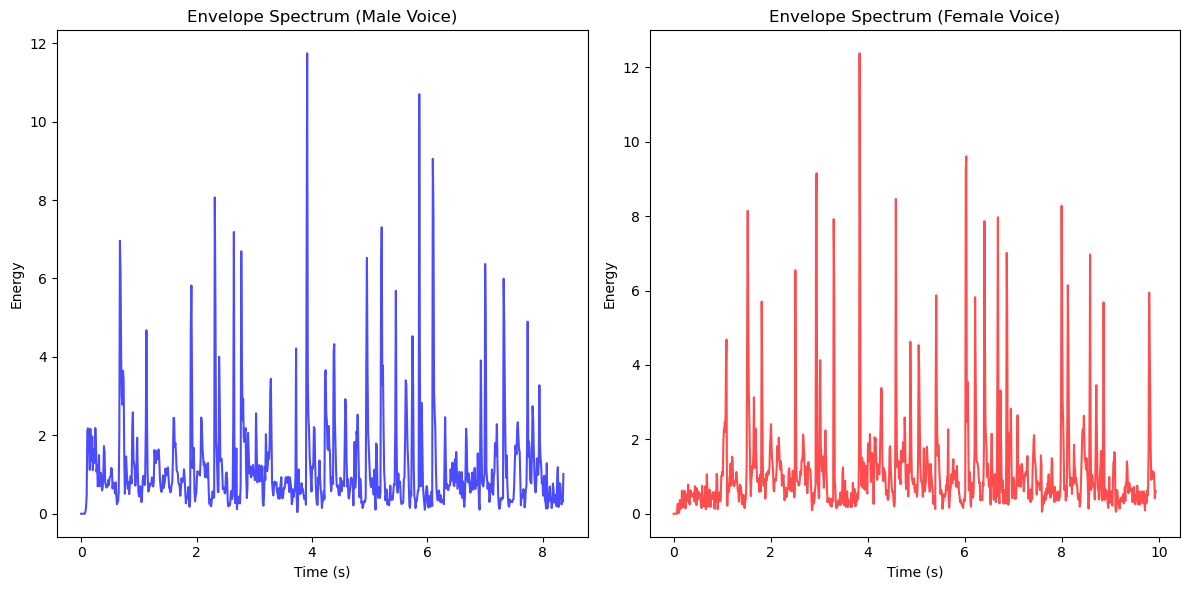

In [4]:
# Compute envelope spectrum
male_envelope = librosa.onset.onset_strength(y=male_audio, sr=male_sr)
female_envelope = librosa.onset.onset_strength(y=female_audio, sr=female_sr)

# Create time axes for the envelopes
male_time = np.linspace(0, len(male_audio) / male_sr, len(male_envelope))
female_time = np.linspace(0, len(female_audio) / female_sr, len(female_envelope))

# Plot side-by-side comparison of envelope spectrum
plt.figure(figsize=(12, 6))

# Male voice envelope
plt.subplot(1, 2, 1)
plt.plot(male_time, male_envelope, color='blue', alpha=0.7)
plt.title('Envelope Spectrum (Male Voice)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')

# Female voice envelope
plt.subplot(1, 2, 2)
plt.plot(female_time, female_envelope, color='red', alpha=0.7)
plt.title('Envelope Spectrum (Female Voice)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()



# Cell 5: Compare Long-Term Spectrum in the Same Graph

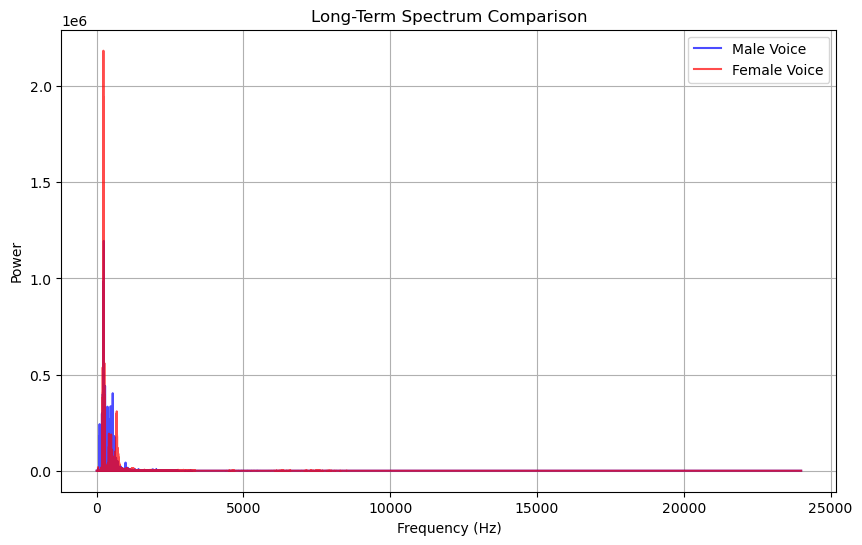

In [5]:
# Plot long-term spectrum comparison on the same graph
plt.figure(figsize=(10, 6))
plt.plot(male_freqs[:len(male_freqs)//2], male_fft[:len(male_fft)//2], label='Male Voice', color='blue', alpha=0.7)
plt.plot(female_freqs[:len(female_freqs)//2], female_fft[:len(female_fft)//2], label='Female Voice', color='red', alpha=0.7)
plt.title('Long-Term Spectrum Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


# Cell 6: Compare Envelope Spectrum in the Same Graph

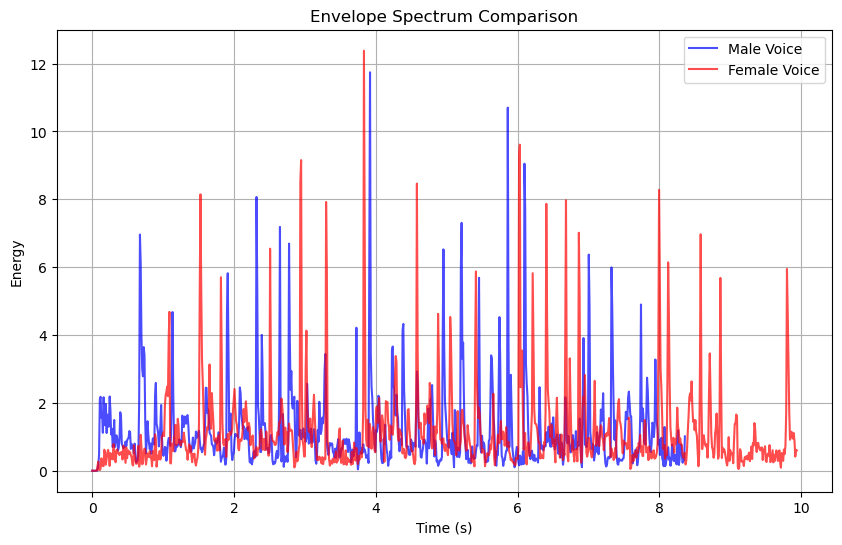

In [6]:
# Plot envelope spectrum comparison on the same graph
plt.figure(figsize=(10, 6))
plt.plot(male_time, male_envelope, label='Male Voice', color='blue', alpha=0.7)
plt.plot(female_time, female_envelope, label='Female Voice', color='red', alpha=0.7)
plt.title('Envelope Spectrum Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()
